In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations>
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-38.804131375924335 71.23034182654555
34.95240657684623 -39.10689394342245
58.422190483036275 34.29929695893463
-34.552844769367816 -105.55203409094403
30.91735291516403 175.0393223849016
51.39022148512268 -75.84145376494124
29.38000806199277 -3.1359479832283625
61.21035942772724 171.50412155812398
-8.720315462144413 120.12451247769496
82.7539255558315 -105.77365639004798
21.59648188772246 51.89237825029778
8.783011017229612 163.72313128198914
80.9307594731441 -48.85000238911803
52.21996017952091 125.07775331139754
-29.4651484394469 153.91712381819877
81.15996583757376 129.65902052156622
-20.908686113647178 53.658844968868436
87.30124131418904 -3.601215858618076
-14.753288594329902 51.178860148825066
-57.36767313337322 177.75274422040758
5.858392886141203 -7.810153208560735
-47.52824287191735 131.63447620423148
-34.40027581539449 122.59411700311671
3.269173771386349 -122.78475071947321
39.24222946670946 -30.873876641300683
71.09666218286736 -44.429614895171824
0.06702720352596714 -137.

-47.467670182253826 -50.480646901873826
84.51321238564785 63.91520884586723
39.56287689709663 -77.10915006261693
-39.746587360157704 166.5965216030433
5.499553883888595 -69.53592528260508
70.02141959469998 -62.53430997285834
-57.08434464491851 128.2449492812686
39.64506484263654 91.26635342078129
-54.87448355415523 -57.109581474211936
-69.93312463218724 -32.67306472013644
59.56658296370949 29.09322569248542
60.81696857576344 171.42028155244373
2.2164731776543647 -155.03837814942023
-6.373371088998255 147.61458615515278
-19.807514156948315 97.83014528313123
-57.5930635436301 120.41421901748186
-82.94086111644998 125.78766009639088
81.80271649680324 70.07425001620865
-38.35012519847948 -89.657588327786
-62.897565354939445 137.3711125862224
-27.08559243717292 -122.37010769166358
6.067302175560528 -94.39983300823955
-54.10434910476429 173.00702666544794
82.08519234250011 140.20763140787375
68.91549485780362 -66.21749378268153
-72.44927521068306 -15.741674337409478
-68.27946240246453 -43.26

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print th beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | moshenskoye
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | chapais
Processing Record 7 of Set 1 | adrar
Processing Record 8 of Set 1 | tilichiki
Processing Record 9 of Set 1 | ruteng
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | tahe
Processing Record 15 of Set 1 | ballina
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | saint-paul
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | antalaha
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | zwedru
Processing Record 22 of Set 1 | mount gambier
Processing

Processing Record 37 of Set 4 | ponta delgada
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | lewisporte
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | bereda
Processing Record 48 of Set 4 | te anau
Processing Record 49 of Set 4 | sapa
Processing Record 50 of Set 4 | lima
Processing Record 1 of Set 5 | zachagansk
City not found. Skipping...
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | chisec
Processing Record 4 of Set 5 | punta alta
Processing Record 5 of Set 5 | lubango
Processing Record 6 of Set 5 | nabire
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | nara
Processing Record 9 of Set 5 | pangnirtu

Processing Record 25 of Set 8 | namie
Processing Record 26 of Set 8 | samusu
City not found. Skipping...
Processing Record 27 of Set 8 | bengkalis
City not found. Skipping...
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | mankera
Processing Record 30 of Set 8 | la plaine
Processing Record 31 of Set 8 | pitsunda
Processing Record 32 of Set 8 | umea
Processing Record 33 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 8 | chacaltianguis
Processing Record 35 of Set 8 | hovd
Processing Record 36 of Set 8 | kangaatsiaq
Processing Record 37 of Set 8 | novobirilyussy
Processing Record 38 of Set 8 | chongqing
Processing Record 39 of Set 8 | am timan
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | ahuimanu
Processing Record 42 of Set 8 | malvern
Processing Record 43 of Set 8 | namatanai
Processing Record 44 of Set 8 | coria
Processing Record 45 of Set 8 | karratha
Processing Record 46 of Set 8 | cayenne
Processing Reco

Processing Record 10 of Set 12 | vuktyl
Processing Record 11 of Set 12 | kristiinankaupunki
Processing Record 12 of Set 12 | bondo
Processing Record 13 of Set 12 | pontes e lacerda
Processing Record 14 of Set 12 | harper
Processing Record 15 of Set 12 | niquero
Processing Record 16 of Set 12 | sao jose da coroa grande
Processing Record 17 of Set 12 | kendari
Processing Record 18 of Set 12 | toora-khem
Processing Record 19 of Set 12 | sao filipe
Processing Record 20 of Set 12 | arcata
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | oussouye
Processing Record 23 of Set 12 | baikunthpur
Processing Record 24 of Set 12 | rawson
Processing Record 25 of Set 12 | dukat
Processing Record 26 of Set 12 | udachnyy
Processing Record 27 of Set 12 | zharkent
Processing Record 28 of Set 12 | sechura
Processing Record 29 of Set 12 | qasigiannguit
Processing Record 30 of Set 12 | chivay
Processing Record 31 of Set 12 | carmarthen
Processing Record 32 of Set 12 | saint stephen


In [20]:
len(city_data)

547

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,75.49,69,75,14.97,MU,2022-09-17 05:15:07
1,Ribeira Grande,38.5167,-28.7000,73.26,85,36,8.88,PT,2022-09-17 05:15:08
2,Moshenskoye,58.5102,34.5911,45.46,95,94,6.53,RU,2022-09-17 05:15:08
3,Rikitea,-23.1203,-134.9692,72.55,73,0,17.34,PF,2022-09-17 05:15:09
4,Nikolskoye,59.7035,30.7861,49.89,87,91,6.78,RU,2022-09-17 05:15:09
5,Chapais,49.7834,-74.8492,42.58,80,4,2.53,CA,2022-09-17 05:15:10
6,Adrar,20.5022,-10.0711,80.37,30,0,8.34,MR,2022-09-17 05:15:11
7,Tilichiki,60.4667,166.1000,45.70,59,79,16.64,RU,2022-09-17 05:15:11
8,Ruteng,-8.6136,120.4721,77.54,49,47,1.63,ID,2022-09-17 05:15:12
9,Yellowknife,62.4560,-114.3525,48.72,93,40,8.01,CA,2022-09-17 05:15:12


In [30]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-09-17 05:15:07,-20.4081,57.7000,75.49,69,75,14.97
1,Ribeira Grande,PT,2022-09-17 05:15:08,38.5167,-28.7000,73.26,85,36,8.88
2,Moshenskoye,RU,2022-09-17 05:15:08,58.5102,34.5911,45.46,95,94,6.53
3,Rikitea,PF,2022-09-17 05:15:09,-23.1203,-134.9692,72.55,73,0,17.34
4,Nikolskoye,RU,2022-09-17 05:15:09,59.7035,30.7861,49.89,87,91,6.78


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

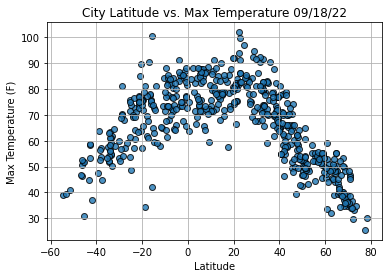

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

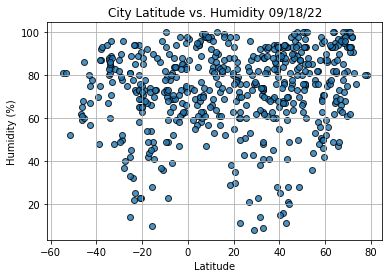

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

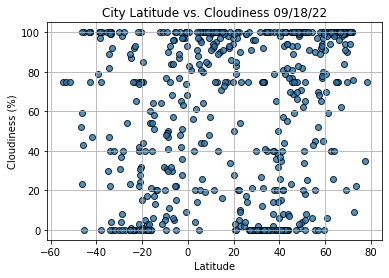

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()